# 선형회귀(Linear Regression)   
그럼 가장 간단한 Linear Regression 을 Tensorflow 로 한번 구현해 보자. 단순 선형회귀를 가정하면 우리가 구하고자 하는 모델은 아마도 y = wx+b 형태가 될 것이고, 우리가 찾고자 하는 값은 주어진 데이터를 가장 잘 설명하는 w와 b 값을 찾는 것이 될 것이다. 그 말은 즉 주어진 데이터와 모델이 차이(Error)를 Minimize 하는 방향으로 w,b 값을 Train 해가면 되는 것이다. Tensorflow 는 기본적으로 이러한 이론을 그대로 코딩하는 형태로 동작한다. 이해를 돕기위하여 아래의 코드를 설명하도록 하겠다. 

<H3>(1) Hyper Parameter</H3>   
- learning_rate : weight 값이 너무 적으면 Train 이 되지 않을 수 있고 weight 값이 너무 크면 Overshooting 이 발생할 수 있으니 적절히 조정필요
- training_epochs : Data Set에 대한 Training 반복 횟수 
- display_step : Log 를 찍는 step 단위 

In [11]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

<H3>(2) Train Data</H3>    


In [12]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

<H3>(3) Graph Design</H3>   
아래 내용을 요약하자면 Y=WX + b 의 Cost가 최소가 되는 W,b 를 Gradient Descent 알고리즘을 사용하여 최적화하는 것이다. 
[1] 은 위에 정의한 train_X, train_Y 를 Feed 하기 위한 placeholder 정의   
[2] Weight, bias 값을 Random 으로 정의한다.   
[3] pred = W * X + b   
[4] cost 함수를 정의한다.   
[5] cost 최소화에 GradientDescentOptimizer 를 사용한다   

In [13]:
# [1] : tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# [2] : Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# [3] : Construct a linear model
pred = tf.add(tf.mul(X, W), b)

# [4] : Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# [5] : Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

<H3>(4) Session Run - Train </H3>    
뭔가 코드가 많지만 아래 내용만 실행해서 optimizer 에 Data 를 Feed 해주면 Train 은 끝나는 것이다.

In [25]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        
    print("Train Finish")
    print("weight : {0}".format(sess.run(W)))
    print("bias : {0}".format(sess.run(b)))

Train Finish
weight : 0.3150399327278137
bias : 0.33064988255500793


<H3>(4) Session Run - LOG 및 테스트</H3>   
아래는 Train 도중 Log 출력, Plot 그래프 출력, Test 데이터 출력 등 코드를 추가한 것이다.  

Epoch: 0050 cost= 0.217838407 W= 0.459413 b= -0.707964
Epoch: 0100 cost= 0.201565370 W= 0.446935 b= -0.618191
Epoch: 0150 cost= 0.187171564 W= 0.435198 b= -0.533758
Epoch: 0200 cost= 0.174439818 W= 0.424159 b= -0.454345
Epoch: 0250 cost= 0.163178414 W= 0.413777 b= -0.379656
Epoch: 0300 cost= 0.153217658 W= 0.404012 b= -0.309409
Epoch: 0350 cost= 0.144407287 W= 0.394828 b= -0.243341
Epoch: 0400 cost= 0.136614442 W= 0.38619 b= -0.181201
Epoch: 0450 cost= 0.129721716 W= 0.378066 b= -0.122757
Epoch: 0500 cost= 0.123625197 W= 0.370425 b= -0.0677889
Epoch: 0550 cost= 0.118232965 W= 0.363239 b= -0.0160903
Epoch: 0600 cost= 0.113463596 W= 0.35648 b= 0.0325337
Epoch: 0650 cost= 0.109245241 W= 0.350123 b= 0.0782659
Epoch: 0700 cost= 0.105514295 W= 0.344144 b= 0.121278
Epoch: 0750 cost= 0.102214418 W= 0.338521 b= 0.161732
Epoch: 0800 cost= 0.099295899 W= 0.333232 b= 0.19978
Epoch: 0850 cost= 0.096714631 W= 0.328257 b= 0.235565
Epoch: 0900 cost= 0.094431683 W= 0.323579 b= 0.269222
Epoch: 0950 cost

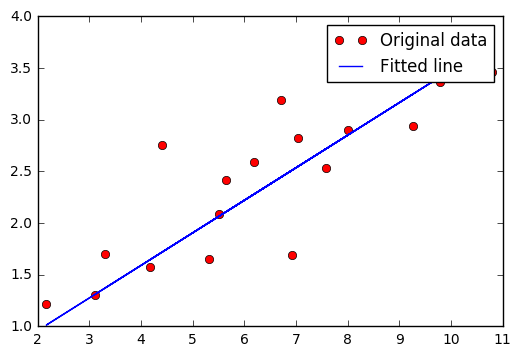

Testing... (Mean square loss Comparison)
Testing cost= 0.0813141
Absolute mean square loss difference: 0.00931279


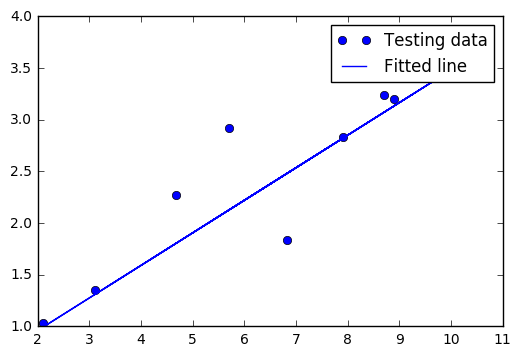

In [31]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # 그래프 PLOT 출력 
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # TEST 코드 
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    